## 2021 Spring "EE479: Scientific Computing & Data"

### Yong-Hoon Kim, KAIST Electrical Engineering

### Linge & Langtagen Ch.4.3.4: A finite difference method (Stomer's method/Verlet integration)

#### Writer: Hyeonwoo Yeo
#### 2021. 04. 13 Revised from <osc_2nd_order.py> & <linear damping() in 4.3.9>

We consider an engineering system with a linear spring, $s(u) = kx,$ and a viscous damper, where the damping force is proportional to $u', f(u') = bu',$ for some constant $b > 0$. This choice may model the vertical spring system in a car.

$$mu^{''}(t)+bu'+s(u)=F(t)$$
$$u(0) = U_{0}, u^{'}(0)=0, t\in (0,T] $$

We may choose simple values for the constants to illustrate basic effects of damping (and later excitations). Chossing the oscilattions to be the simple $u(t) = cost$ function in the undamped case, we may set $m = 1, k = 1, b = 0.3, U_0 = 1, V_0 = 0$. 

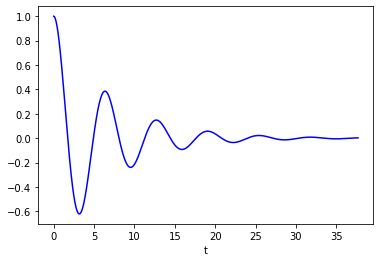

calculation time for Verlet integration: 0.12302303314208984


In [13]:
from numpy import zeros, linspace, cos
from math import pi
import matplotlib.pyplot as plt
import time

def osc_2nd_order(s, F, m, T, U_0, dt, b):
    """
    Solver u'' + omega**2*u = 0 for t in (0,T], u(0)=U_0 and u'(0)=0,
    by a central finite difference method with time step dt.
    """
    Nt = int(round(T/dt))
    u = zeros(Nt+1)
    a = zeros(Nt+1)
    t = linspace(0, Nt*dt, Nt+1)
    
    u[0] = U_0
#    dt = (-1)*dt  # Time reverse
    u[1] = u[0] + 0.5*(1./m)*dt**2*(F(t[0])-s(u[0]))         
    for n in range(1, Nt):
        u[n+1] = (2*m*u[n] + (0.5*b*dt-m)*u[n-1]+dt**2*(F(t[n])-s(u[n])))*(m+0.5*b*dt)**(-1)
#        u[n+1] = ((m+0.5*b*dt)*u[n-1] - 2*m*u[n] - dt**2*(F(t[n])-s(u[n])))*(0.5*b*dt-m)**(-1)  #time reversibility
    return u, t

def linear_damping_Verlet():
    b = 0.3
    s = lambda u: k*u
    F = lambda t: 0
        
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u1, t1 = osc_2nd_order(s, F, m, T, U_0, dt, b)

    fig = plt.figure()
    index1 = int(len(u1)*100/100.)
    l1 = plt.plot(t1, u1, 'b-')
    plt.xlabel('t')
    plt.show()

if __name__ == '__main__':
    start = time.time()
    linear_damping_Verlet()
    time_calc = time.time() - start
    print('calculation time for Verlet integration:', time_calc)

N_t: 5000


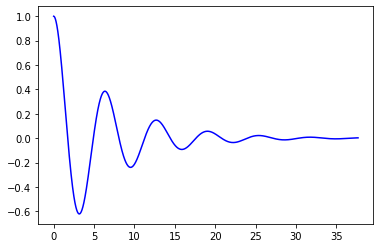

calculation time for Euler-Cromer: 0.1309986114501953


In [7]:
from math import pi
import matplotlib.pyplot as plt
from scipy import integrate as inte
import time

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    from numpy import zeros, linspace
    N_t = int(round(T/dt))
    print('N_t:', N_t)
    t = linspace(0, N_t*dt, N_t+1)
    
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    # Initial condition
    u[0] = U_0
    v[0] = V_0
    # Step equations forward in time
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def linear_damping():
    b = 0.3
    f = lambda v: b*v
    s = lambda u: k*u
    F = lambda t: 0
    
    m = 1
    k = 1
    U_0 = 1
    V_0 = 0
    
    T = 12*pi
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                          U_0=U_0, V_0=V_0, dt=dt)

    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()

if __name__ == '__main__':
    start = time.time()
    linear_damping()
    time_calc = time.time() - start
    print('calculation time for Euler-Cromer:', time_calc)